# Check the damping term wfcor in both FUT08 & REF08 experiments 

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
from netCDF4 import Dataset
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import rcParams
from mpl_toolkits.basemap import Basemap

%matplotlib inline

>> Function definition START

In [2]:
def Arc_Bat(ztype='isol1000') :

        locpath='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG12.L75/GRID/'
        locfile='bathymetry_CREG12_V3.3_CT20180612Larger_ct20190102.nc'
        fieldbat=Dataset(locpath+locfile)
        lon  = np.squeeze(fieldbat.variables['nav_lon'])
        lat  = np.squeeze(fieldbat.variables['nav_lat'])
        My_var = np.squeeze(fieldbat.variables['Bathymetry'])

        spval = 0.
        My_var= np.ma.masked_where(My_var <= spval,My_var)

        if ztype == 'isol1000' :
                vmin=1000. ; vmax=2000.
                contours=[1000.]
                limits=[vmin,vmax]
                myticks=[1000.]
        elif ztype == 'isol1500' :
                vmin=1500. ; vmax=2000.
                contours=[1500.]
                limits=[vmin,vmax]
                myticks=[1500.]
        elif ztype == 'isomonarc' :
                vmin=500. ; vmax=4000.
                contours=[500.,2000.,4000.]
                limits=[vmin,vmax]
                myticks=[500.,2000.,4000.]
        elif ztype == 'isol500' :
                vmin=500. ; vmax=500.
                contours=[500.]
                limits=[vmin,vmax]
                myticks=[500.]
        else:
                vmin=0. ; vmax=8000.
                contours=[100.,500.,1000.,2000.,3000.,3500.,4000.]
                limits=[vmin,vmax]
                myticks=[100.,500.,1000.,2000.,3000.,3500.,4000.]

        #
        #rcParams['text.latex.unicode']=True
        plt.rcParams['contour.negative_linestyle'] = 'solid'
        #
        m = Basemap(projection='npstere',boundinglat=65,lon_0=-60, resolution='i')
        norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
        pal = plt.cm.get_cmap('binary')
        X,Y = m(lon,lat)

        # contour (optional)
        CS2 = m.contour(X, Y, My_var, linewidths=0.5,levels=contours, colors='black', alpha=1.)
        plt.clabel(CS2, CS2.levels, inline=True, fmt='%.0f', fontsize=3)

        return m, X, Y


In [3]:
def Arc_plot(lon,lat,tab,contours,limits,myticks=None,name=None,zmy_cblab=None,zmy_cmap=None,filename='test.pdf',zvar=None):
        #
# Les 2 lignes suivantes posent un probleme a l'execution lie a LaTex ....
#       rcParams['text.usetex']=True
#       rcParams['text.latex.unicode']=True
        #rcParams['font.family']='serif'

        plt.rcParams['contour.negative_linestyle'] = 'solid'
        #
        m = Basemap(projection='npstere',boundinglat=65,lon_0=-60, resolution='i')

        if zvar == 'sivolu' or zvar == 'siconc'  or zvar == 'ssh' or zvar == 'socurl' :
                zfontsize=10.
        else:
                zfontsize=6.

        if zvar != 'Bathy' :
                m.drawparallels(np.arange(-90.,91.,5.),labels=[False,False,False,False], size=zfontsize, linewidth=0.3)
                m.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True], size=zfontsize, latmax=90.,linewidth=0.3)
                m.fillcontinents(color='grey',lake_color='white')

        norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])

        if zmy_cmap != None :
                pal = zmy_cmap
        else:
                pal = plt.cm.get_cmap('coolwarm')
                #pal = plt.cm.get_cmap('terrain')

        X,Y = m(lon,lat)
        C = m.contourf(X,Y,tab,contours,cmap=pal,norm=norm,extend='both')
        if zvar == 'ssh':
                CS=m.contour(X, Y, tab, linewidths=0.5, levels=npy.arange(limits[0],limits[1],5.), colors='k', alpha=0.4)

        ############################################################################################################
        ############################################################################################################
        moorplot=1
        if moorplot == 1 :
                bx_ARCB={'name':'B'  ,'lon_min':-150.,'lon_max':-150.,'lat_min':78.,'lat_max':78.}
                bx_ARCM={'name':'M1' ,'lon_min': 125.,'lon_max': 125.,'lat_min':78.,'lat_max':78.}
                bx_EURA={'name':'EUR','lon_min':  60.,'lon_max':  60.,'lat_min':85.,'lat_max':85.}

                All_box=[bx_ARCB,bx_EURA]
                for box in All_box:
                        lats = [box['lat_min'],box['lat_max']]
                        lons = [box['lon_min'],box['lon_max']]
                        x,y = m(lons,lats)
                        m.scatter(x,y,3,marker='o', color='r')
                        #m.plot(x,y,linewidth=2, color='g')
        ############################################################################################################
        ############################################################################################################

        # colorbar      
        if myticks is None:
                cbar = plt.colorbar(C,format='%.2f',orientation='vertical',shrink=0.8)
        else:
                if zvar == 'votemper' or zvar == 'vosaline' or zvar == 'sivolu' :
                        cbar = plt.colorbar(C,format='%.2f',orientation='vertical',shrink=0.8,drawedges=True)
                else:
                        cbar = plt.colorbar(C,format='%.0f',orientation='vertical',shrink=0.8,drawedges=True)

                cbar.set_label(zmy_cblab,fontsize=zfontsize)
                cl = plt.getp(cbar.ax, 'ymajorticklabels')
                plt.setp(cl, fontsize=zfontsize)

        plt.title(name,fontsize=zfontsize)

        return

>> Function definition END

# CREG12.L75-REF12 Grid

In [5]:
GRIDPATH='/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/'
ds_grd=xr.open_dataset(GRIDPATH+'CREG12.L75-REF09_mesh_mask_domain_cfg_20230810_Z.nc',drop_variables={'x','y'})
ds_grd
tmask2D=ds_grd['tmask'].isel(nav_lev=0,time_counter=0)

# Read the initial state based on WOA09

In [7]:
PATHIN='/data0/project/drakkar/CONFIGS/CREG12.L75/CREG12.L75-I/'
ds_woa09=xr.open_dataset(PATHIN+'CREG12.L75-REF06_init_gridT.nc')

vosaline=ds_woa09['vosaline'].isel(time_counter=0)
votemper=ds_woa09['votemper'].isel(time_counter=0)

In [8]:
ds_woa09

<xarray.Dataset>
Dimensions:       (y: 1801, x: 1580, deptht: 75, ncatice: 5, time_counter: 1)
Coordinates:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
  * deptht        (deptht) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * ncatice       (ncatice) float32 1.0 2.0 3.0 4.0 5.0
  * time_counter  (time_counter) object 1979-01-01 00:06:00
Dimensions without coordinates: y, x
Data variables: (12/39)
    vosaline      (time_counter, deptht, y, x) float32 ...
    votemper      (time_counter, deptht, y, x) float32 ...
    vosigma0      (time_counter, deptht, y, x) float32 ...
    sossheig      (time_counter, y, x) float32 ...
    vozocrtx      (time_counter, deptht, y, x) float32 ...
    vomecrty      (time_counter, deptht, y, x) float32 ...
    ...            ...
    sithicat      (time_counter, ncatice, y, x) float32 ...
    siconcat      (time_counter, ncatice, y, x) float32 ...
    sisalcat      (time_counter, ncatice, y, x) float32 ...
    sitemcat      (time_counter, ncatice, y, x) float32 ...
    snthicat      (time_counter, ncatice, y, x) float32 ...
    sntemcat      (time_counter, ncatice, y, x) float32 ...
Attributes:
    Conventions:  CF-1.1
    production:   An IPSL model
    TimeStamp:    05/04/2019 15:58:22 +0200
    file_name:    output.init.nc

# Read the Rossby radius based on WOA09 and mean 2005-2015 from REF08 

In [2]:
INP='/data0/project/drakkar/CONFIGS/CREG12.L75/CREG12.L75-REF08-S/5d/2015/'
ds_ref08=xr.open_mfdataset(INP+'CREG12.L75-REF08_y2015m*.5d_flxT.nc')

In [3]:
INP='/data0/project/drakkar/CONFIGS/CREG12.L75/CREG12.L75-FUT08-S/5d/2060/'
ds_fut08=xr.open_mfdataset(INP+'CREG12.L75-FUT08_y2060m*.5d_flxT.nc')

In [8]:
ds_fut08.time_counter

<xarray.DataArray 'time_counter' (time_counter: 73)>
array([cftime.DatetimeNoLeap(2060, 1, 3, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 1, 8, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 1, 13, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 1, 18, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 1, 23, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 1, 28, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 2, 2, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 2, 7, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 2, 12, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 2, 17, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 2, 22, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 2, 27, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 3, 4, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 3, 9, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 3, 14, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 3, 19, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 3, 24, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 3, 29, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 4, 3, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 4, 8, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 4, 13, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 4, 18, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 4, 23, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 4, 28, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 5, 3, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 5, 8, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 5, 13, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 5, 18, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 5, 23, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 5, 28, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 6, 2, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 6, 7, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 6, 12, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 6, 17, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 6, 22, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 6, 27, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 7, 2, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 7, 7, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 7, 12, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 7, 17, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 7, 22, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 7, 27, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 8, 1, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 8, 6, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 8, 11, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 8, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 8, 21, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 8, 26, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 8, 31, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 9, 5, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 9, 10, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 9, 15, 12, 0, 0, 0, has_year_zero=True),
       cftim

In [4]:
# Redefine a new propoer time axis
new_time_axis=pd.date_range(start='2015-01-03',end='2015-12-27',freq='5d')
new_time_axis

DatetimeIndex(['2015-01-03', '2015-01-08', '2015-01-13', '2015-01-18',
               '2015-01-23', '2015-01-28', '2015-02-02', '2015-02-07',
               '2015-02-12', '2015-02-17', '2015-02-22', '2015-02-27',
               '2015-03-04', '2015-03-09', '2015-03-14', '2015-03-19',
               '2015-03-24', '2015-03-29', '2015-04-03', '2015-04-08',
               '2015-04-13', '2015-04-18', '2015-04-23', '2015-04-28',
               '2015-05-03', '2015-05-08', '2015-05-13', '2015-05-18',
               '2015-05-23', '2015-05-28', '2015-06-02', '2015-06-07',
               '2015-06-12', '2015-06-17', '2015-06-22', '2015-06-27',
               '2015-07-02', '2015-07-07', '2015-07-12', '2015-07-17',
               '2015-07-22', '2015-07-27', '2015-08-01', '2015-08-06',
               '2015-08-11', '2015-08-16', '2015-08-21', '2015-08-26',
               '2015-08-31', '2015-09-05', '2015-09-10', '2015-09-15',
               '2015-09-20', '2015-09-25', '2015-09-30', '2015-10-05',
      

In [5]:
ds_DMP_ref08=xr.Dataset() 
ds_DMP_ref08['time_counter']=('time_counter',new_time_axis)
ds_DMP_ref08['empmr']=(('time_counter','y','x'),ds_ref08['empmr'].values)
ds_DMP_ref08['wfcorr']=(('time_counter','y','x'),ds_ref08['wfcorr'].values)

In [15]:
ds_DMP_ref08

<xarray.Dataset>
Dimensions:       (time_counter: 72, y: 1801, x: 1580)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2015-01-03 ... 2015-12-24
Dimensions without coordinates: y, x
Data variables:
    empmr         (time_counter, y, x) float32 nan nan nan nan ... nan nan nan
    wfcorr        (time_counter, y, x) float32 nan nan nan nan ... nan nan nan

In [11]:
# Redefine a new propoer time axis
new_time_axis=pd.date_range(start='2060-01-03',end='2060-12-29',freq='5d')
new_time_axis

DatetimeIndex(['2060-01-03', '2060-01-08', '2060-01-13', '2060-01-18',
               '2060-01-23', '2060-01-28', '2060-02-02', '2060-02-07',
               '2060-02-12', '2060-02-17', '2060-02-22', '2060-02-27',
               '2060-03-03', '2060-03-08', '2060-03-13', '2060-03-18',
               '2060-03-23', '2060-03-28', '2060-04-02', '2060-04-07',
               '2060-04-12', '2060-04-17', '2060-04-22', '2060-04-27',
               '2060-05-02', '2060-05-07', '2060-05-12', '2060-05-17',
               '2060-05-22', '2060-05-27', '2060-06-01', '2060-06-06',
               '2060-06-11', '2060-06-16', '2060-06-21', '2060-06-26',
               '2060-07-01', '2060-07-06', '2060-07-11', '2060-07-16',
               '2060-07-21', '2060-07-26', '2060-07-31', '2060-08-05',
               '2060-08-10', '2060-08-15', '2060-08-20', '2060-08-25',
               '2060-08-30', '2060-09-04', '2060-09-09', '2060-09-14',
               '2060-09-19', '2060-09-24', '2060-09-29', '2060-10-04',
      

In [14]:
ds_DMP_fut08=xr.Dataset() 
ds_DMP_fut08.coords['time_counter']=('time_counter',new_time_axis)
ds_DMP_fut08['empmr']=(('time_counter','y','x'),ds_fut08['empmr'].values)
ds_DMP_fut08['wfcorr']=(('time_counter','y','x'),ds_fut08['wfcorr'].values)

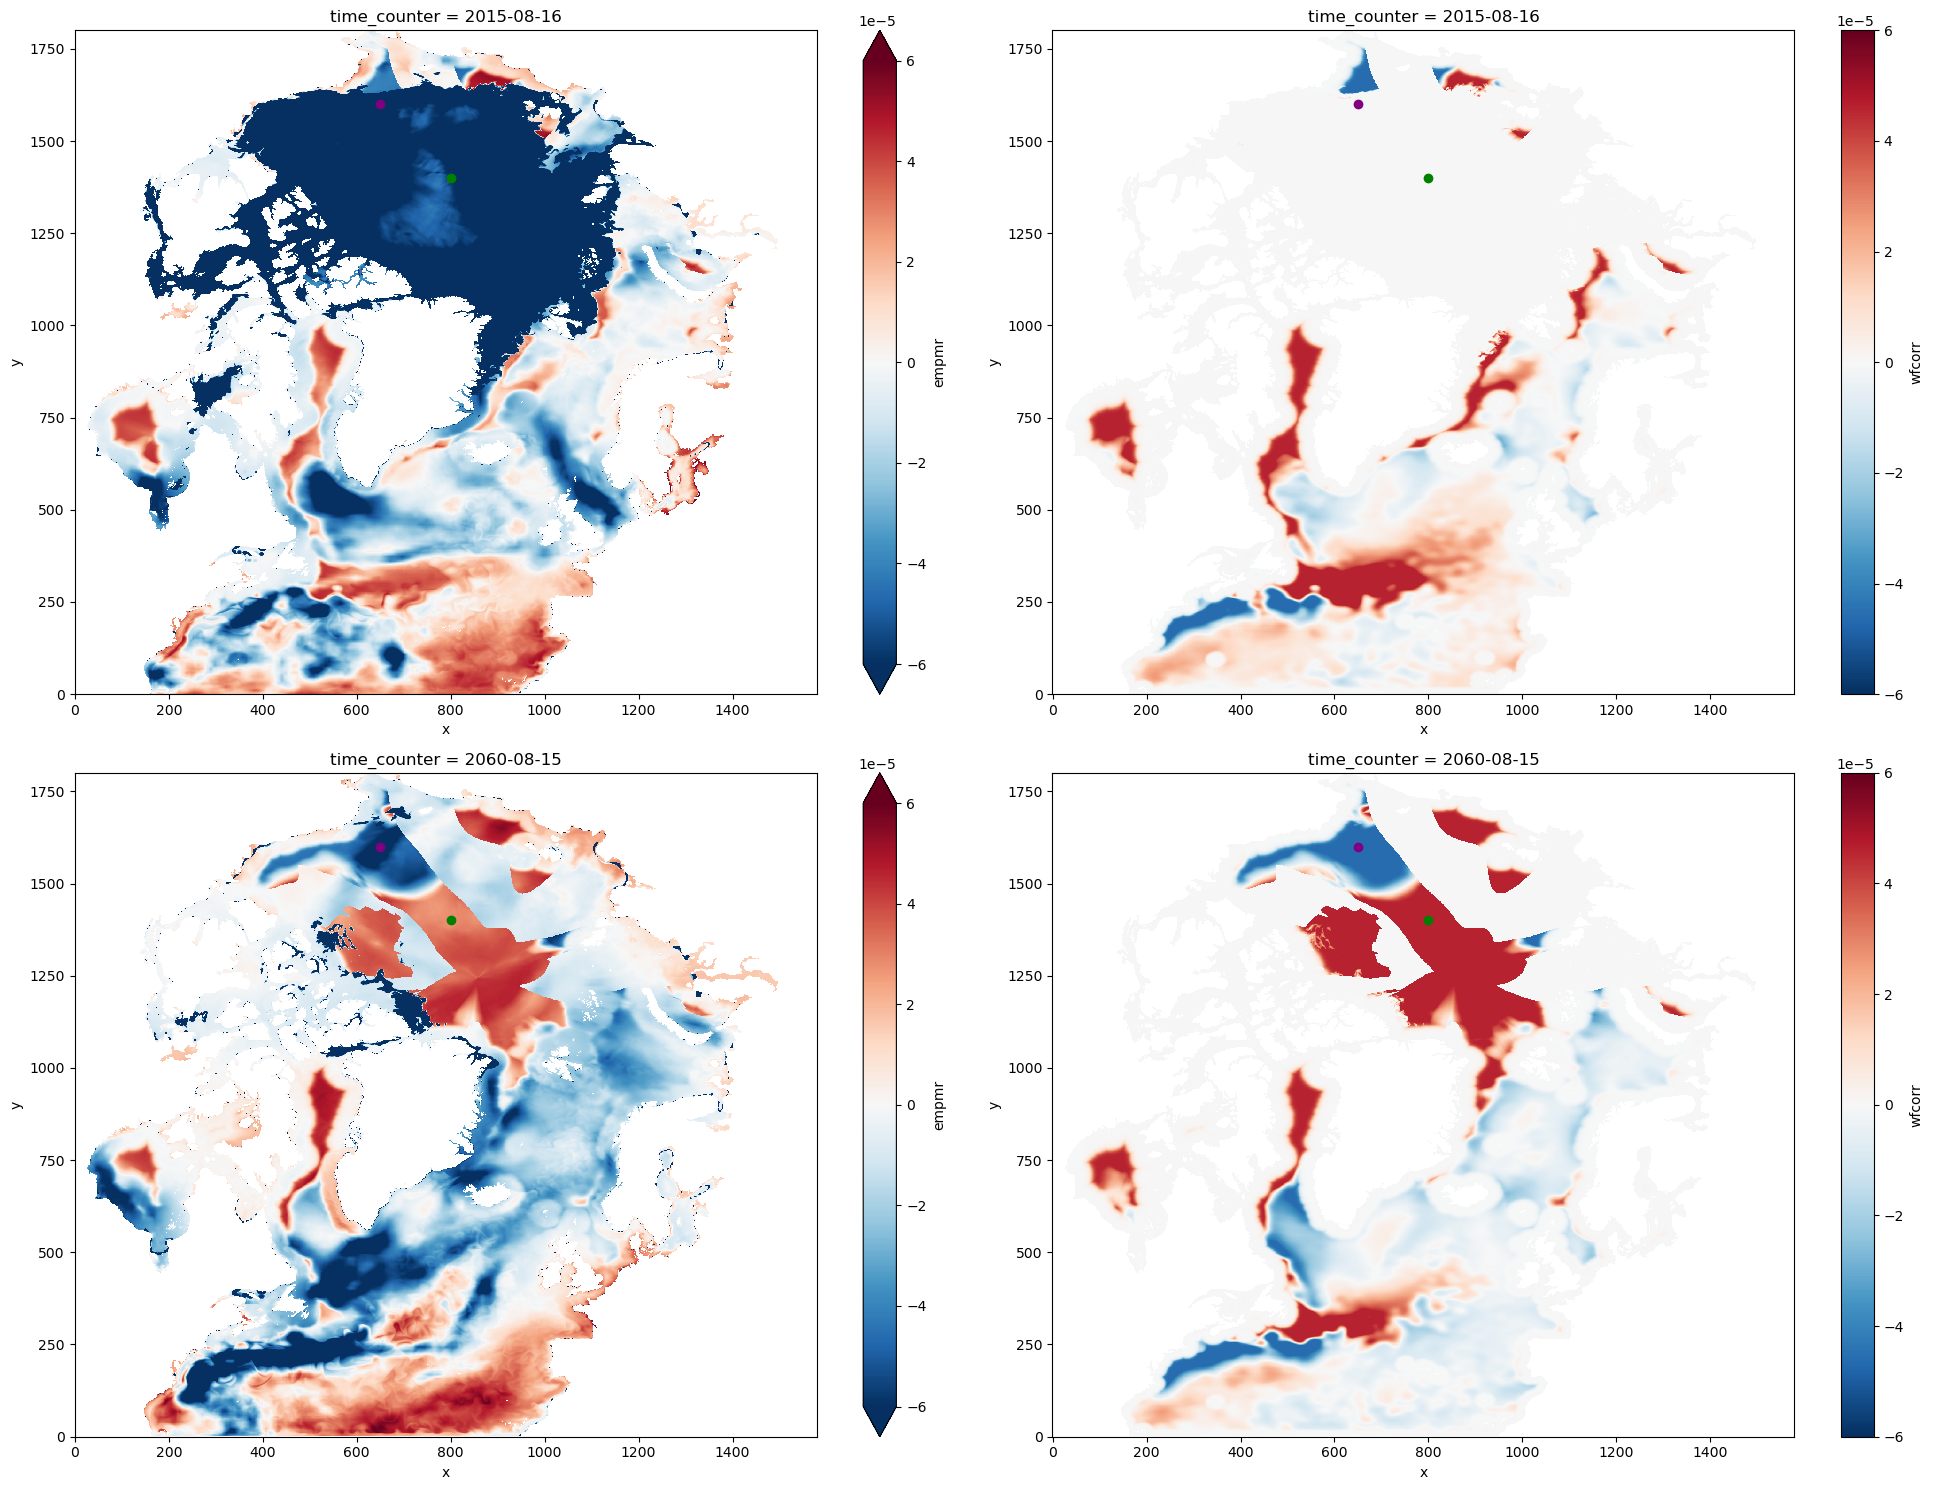

In [38]:
plt.figure(figsize=(20,15))
zmin=-6e-5  ;  zmax=6e-5

plt.subplot(221)
plt.title('REF08 EmPmR 2015-08')
ds_DMP_ref08.empmr.sel(time_counter='2015-08-15',method='nearest').plot(cmap='RdBu_r',vmin=zmin,vmax=zmax)
plt.scatter(x=800,y=1400,marker='o',color='green')
plt.scatter(x=650,y=1600,marker='o',color='purple')


plt.subplot(222)
plt.title('REF08 erp 2015-08')
ax=ds_DMP_ref08.wfcorr.sel(time_counter='2015-08-15',method='nearest').plot(cmap='RdBu_r',vmin=zmin,vmax=zmax)
plt.scatter(x=800,y=1400,marker='o',color='green')
plt.scatter(x=650,y=1600,marker='o',color='purple')


plt.subplot(223)
plt.title('FUT08 EmPmR 2060-08')
ds_DMP_fut08.empmr.sel(time_counter='2060-08-15',method='nearest').plot(cmap='RdBu_r',vmin=zmin,vmax=zmax)
plt.scatter(x=800,y=1400,marker='o',color='green')
plt.scatter(x=650,y=1600,marker='o',color='purple')


plt.subplot(224)
plt.title('FUT08 erp 2060-08')
ds_DMP_fut08.wfcorr.sel(time_counter='2060-08-15',method='nearest').plot(cmap='RdBu_r',vmin=zmin,vmax=zmax)
plt.scatter(x=800,y=1400,marker='o',color='green')
plt.scatter(x=650,y=1600,marker='o',color='purple')

plt.tight_layout()

if False : plt.savefig('CREG12.L75-REF08_RossbyRad.png',dpi=300)

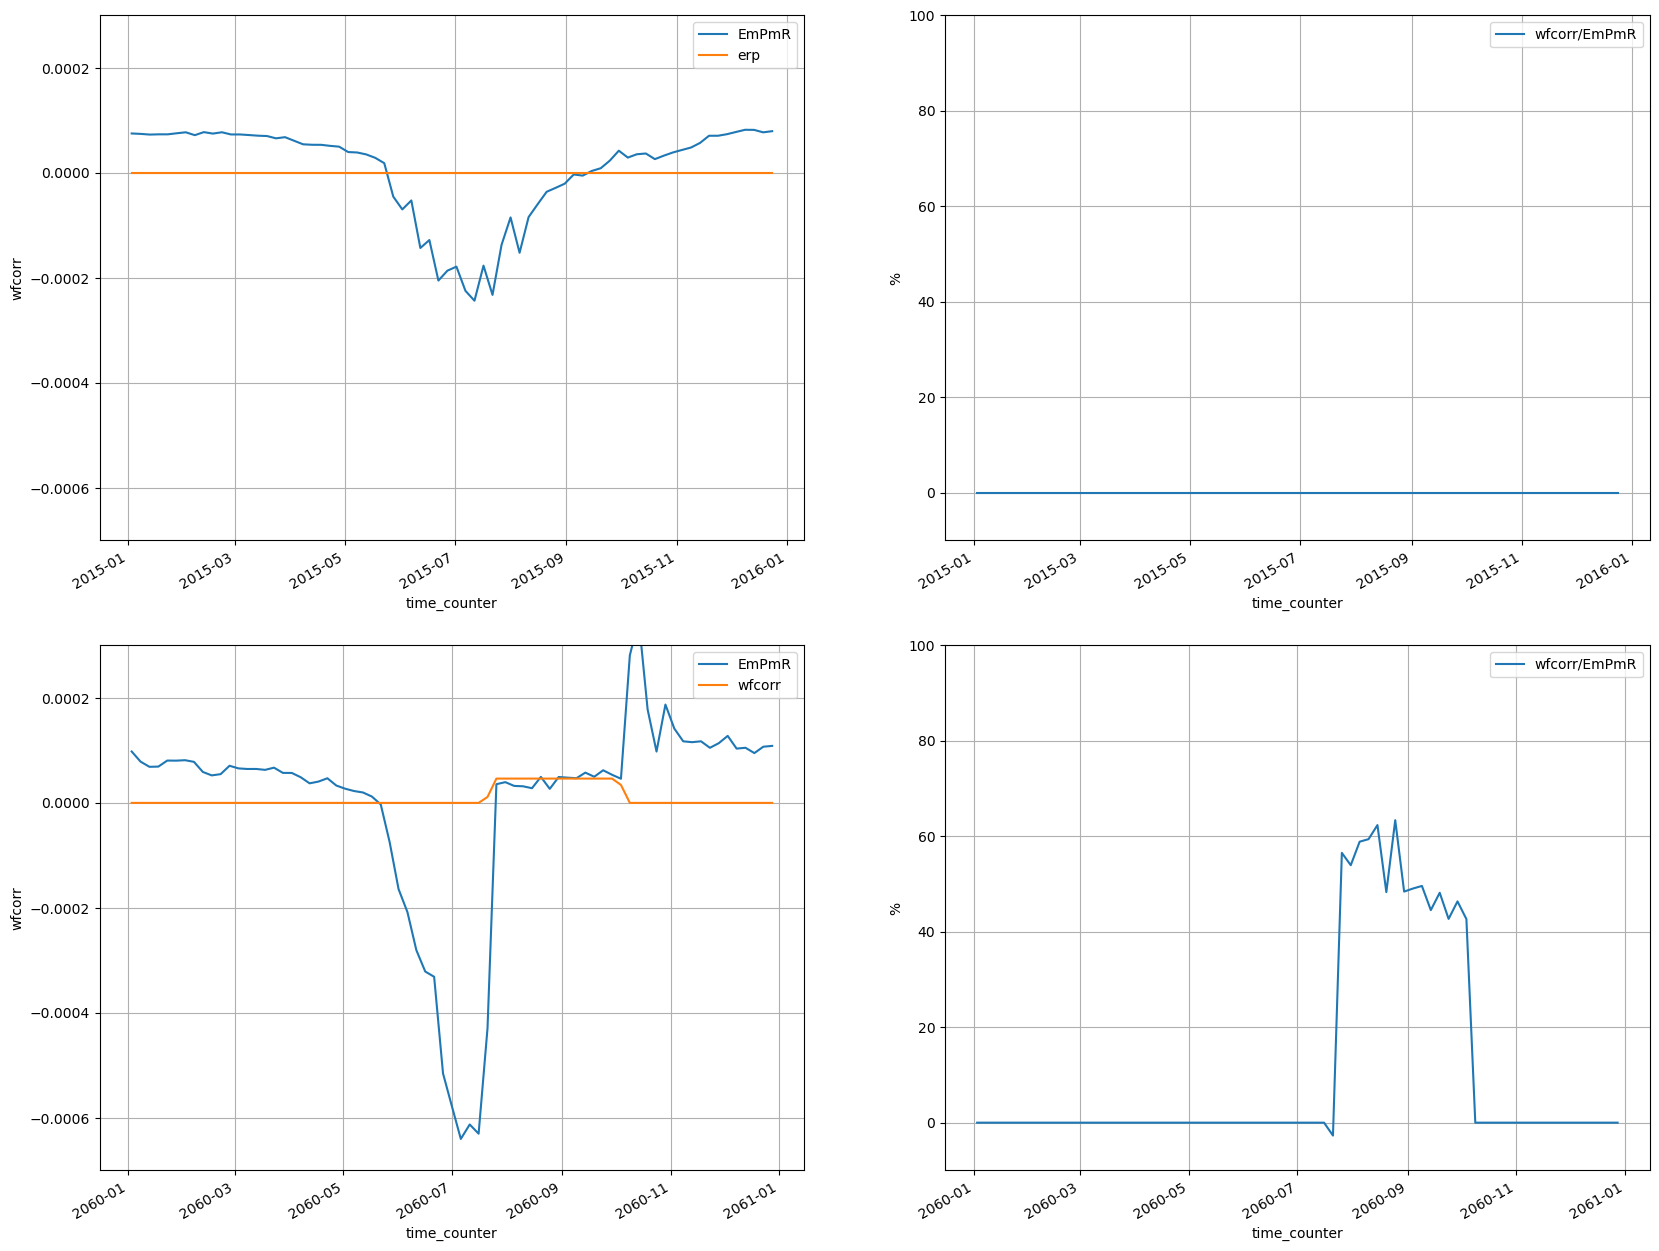

In [36]:
plt.figure(figsize=(20,15))
zmin=-6e-5  ;  zmax=6e-5

plt.subplot(221)
plt.title('REF08')
ds_DMP_ref08.empmr.isel(x=800,y=1400).plot(label='EmPmR')
ds_DMP_ref08.wfcorr.isel(x=800,y=1400).plot(label='erp')
plt.ylim([-7.e-4,3.e-4])
plt.grid(True)
plt.legend()

plt.subplot(222)
plt.title('REF08 ratio wfcorr/empr')
((ds_DMP_ref08.wfcorr/(ds_DMP_ref08.empmr+ds_DMP_ref08.wfcorr))*100.).isel(x=800,y=1400).plot(label='wfcorr/EmPmR')
plt.ylabel('%')
plt.ylim([-10,100.])
plt.grid(True)
plt.legend()

plt.subplot(223)
plt.title('FUT08')
ds_DMP_fut08.empmr.isel(x=800,y=1400).plot(label='EmPmR')
ds_DMP_fut08.wfcorr.isel(x=800,y=1400).plot(label='wfcorr')
plt.ylim([-7.e-4,3.e-4])
plt.grid(True)
plt.legend()

plt.subplot(224)
plt.title('FUT08 ratio wfcorr/empr')
((ds_DMP_fut08.wfcorr/(ds_DMP_fut08.empmr+ds_DMP_fut08.wfcorr))*100.).isel(x=800,y=1400).plot(label='wfcorr/EmPmR')
plt.ylabel('%')
plt.ylim([-10,100.])
plt.grid(True)
plt.legend()

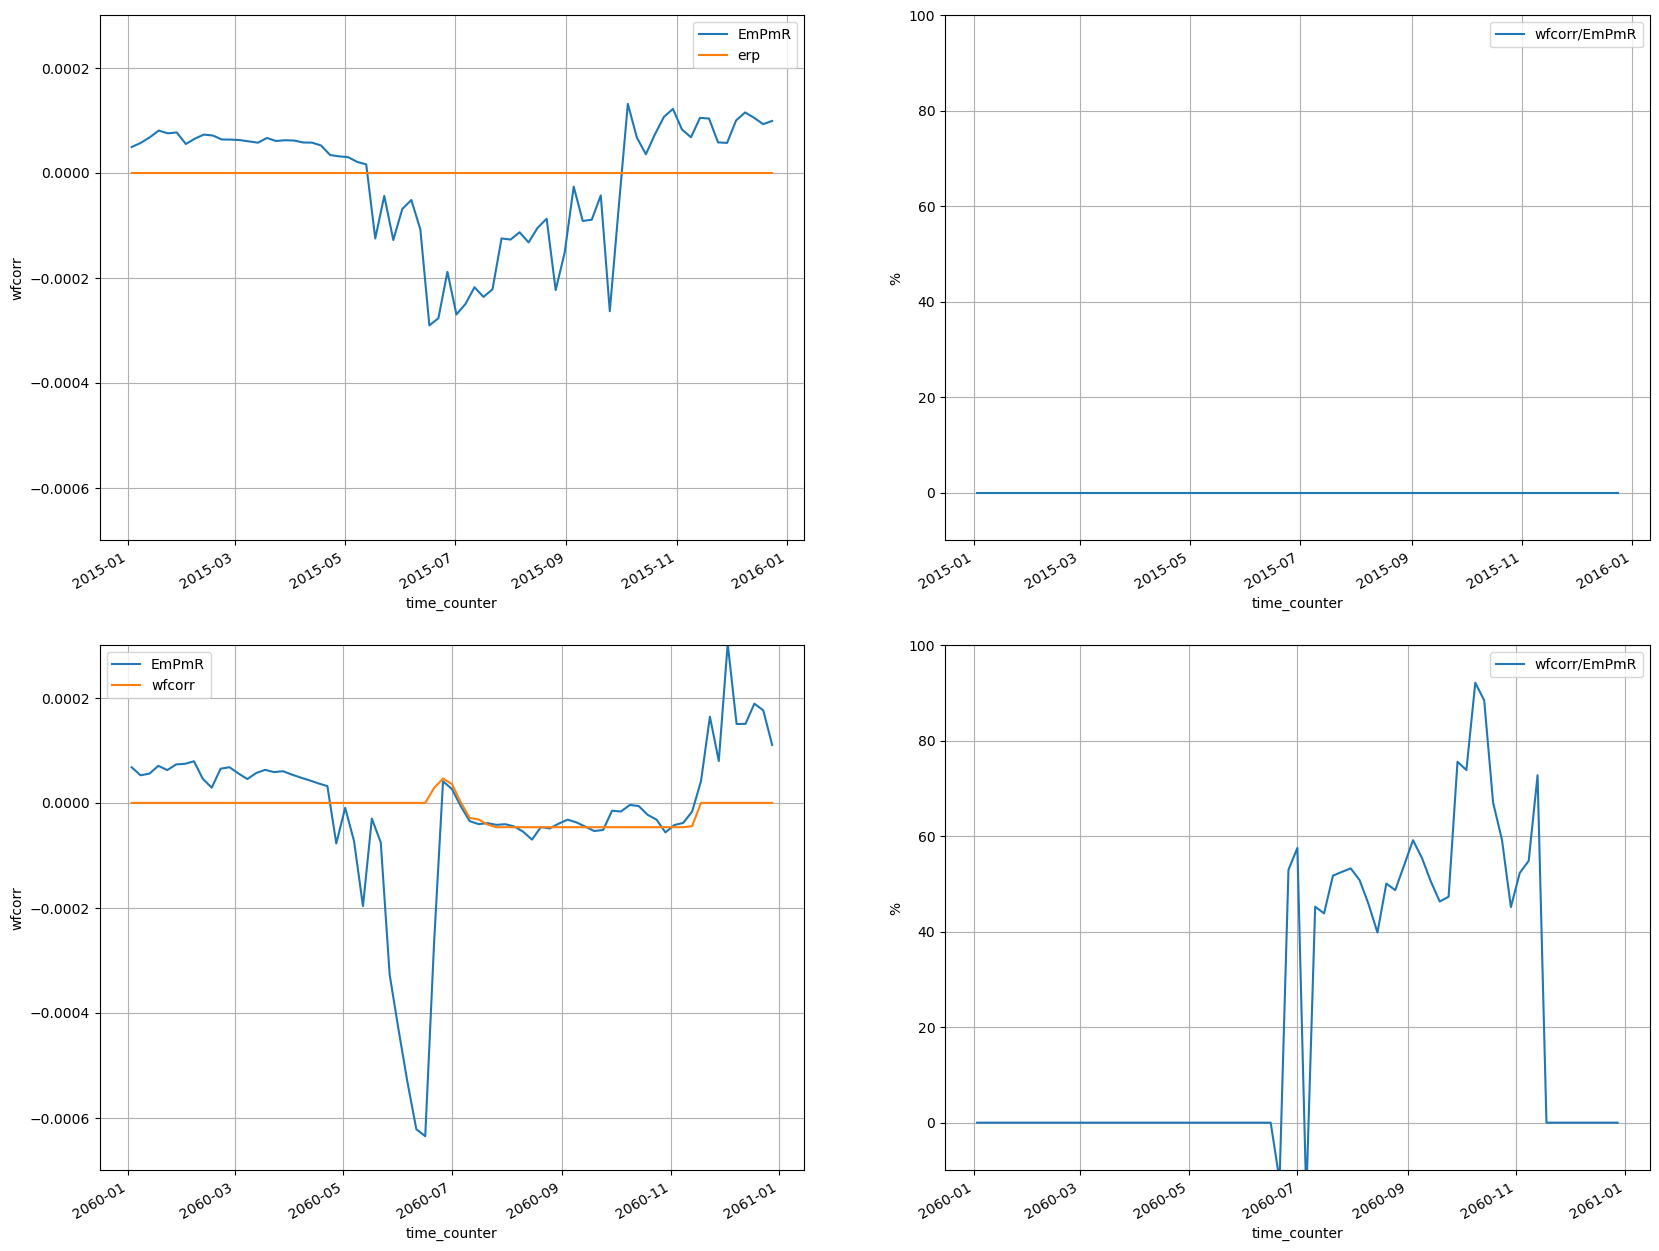

In [39]:
plt.figure(figsize=(20,15))
zmin=-6e-5  ;  zmax=6e-5

xlox=650 ; yloc=1600


plt.subplot(221)
plt.title('REF08')
ds_DMP_ref08.empmr.isel(x=xlox,y=yloc).plot(label='EmPmR')
ds_DMP_ref08.wfcorr.isel(x=xlox,y=yloc).plot(label='erp')
plt.ylim([-7.e-4,3.e-4])
plt.grid(True)
plt.legend()

plt.subplot(222)
plt.title('REF08 ratio wfcorr/empr')
((ds_DMP_ref08.wfcorr/(ds_DMP_ref08.empmr+ds_DMP_ref08.wfcorr))*100.).isel(x=xlox,y=yloc).plot(label='wfcorr/EmPmR')
plt.ylabel('%')
plt.ylim([-10,100.])
plt.grid(True)
plt.legend()

plt.subplot(223)
plt.title('FUT08')
ds_DMP_fut08.empmr.isel(x=xlox,y=yloc).plot(label='EmPmR')
ds_DMP_fut08.wfcorr.isel(x=xlox,y=yloc).plot(label='wfcorr')
plt.ylim([-7.e-4,3.e-4])
plt.grid(True)
plt.legend()

plt.subplot(224)
plt.title('FUT08 ratio wfcorr/empr')
((ds_DMP_fut08.wfcorr/(ds_DMP_fut08.empmr+ds_DMP_fut08.wfcorr))*100.).isel(x=xlox,y=yloc).plot(label='wfcorr/EmPmR')
plt.ylabel('%')
plt.ylim([-10,100.])
plt.grid(True)
plt.legend()